## <div align="center">FINAL PROJECT IF540 MACHINE LEARNING</div>
### <div align="center">Klasifikasi & Analisis Perilaku Pengunjung Mall Dengan Hierarchical Clustering Berdasarkan Karakteristik Kehidupan Untuk Perencanaan Marketing</div>

#### <div align="center">Semester Genap 2023/2024</div>

In [1]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Buka Data
customer = pd.read_csv('Customers.csv')
print("Columns of the DataFrame: \n{}".format(customer.columns))
customer

Columns of the DataFrame: 
Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [3]:
#Cek Missing Value
customer.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [4]:
#Handle Missing Value
#Dengan Cara Most Frequent Value Dari Kolomnya
mode_profession = customer['Profession'].mode()[0]
customer['Profession'].fillna(mode_profession, inplace=True)

In [5]:
#Cek Missing Value lagi
customer.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [6]:
#One Hot Encoding Untuk Handle CATEGORICAL Data
customer_encoded = pd.get_dummies(customer, columns=['Gender', 'Profession'])
customer_encoded

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,1,19,15000,39,1,4,0,1,0,0,0,0,0,1,0,0,0
1,2,21,35000,81,3,3,0,1,0,0,1,0,0,0,0,0,0
2,3,20,86000,6,1,1,1,0,0,0,1,0,0,0,0,0,0
3,4,23,59000,77,0,2,1,0,0,0,0,0,0,0,0,1,0
4,5,31,38000,40,2,6,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,71,184387,40,8,7,1,0,1,0,0,0,0,0,0,0,0
1996,1997,91,73158,32,7,7,1,0,0,1,0,0,0,0,0,0,0
1997,1998,87,90961,14,9,2,0,1,0,0,0,0,0,1,0,0,0
1998,1999,77,182109,4,7,2,0,1,0,0,0,0,1,0,0,0,0


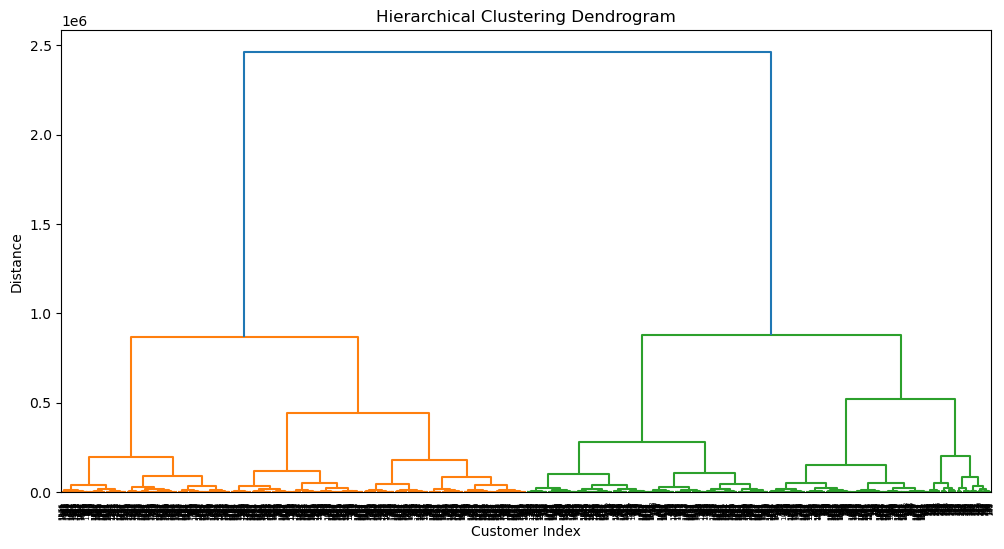

In [7]:
#Plot Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(customer_encoded, method='ward', metric='euclidean') #Pakai metode ward & metric euclidean

plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

In [8]:
#Mulai Hierarchical Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_encoded)

#Pilih n_clusters
n_clusters = 7
clusterer = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = clusterer.fit_predict(scaled_data)

customer_encoded['Cluster'] = cluster_labels
customer_encoded

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Cluster
0,1,19,15000,39,1,4,0,1,0,0,0,0,0,1,0,0,0,2
1,2,21,35000,81,3,3,0,1,0,0,1,0,0,0,0,0,0,4
2,3,20,86000,6,1,1,1,0,0,0,1,0,0,0,0,0,0,4
3,4,23,59000,77,0,2,1,0,0,0,0,0,0,0,0,1,0,6
4,5,31,38000,40,2,6,1,0,0,0,0,1,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,71,184387,40,8,7,1,0,1,0,0,0,0,0,0,0,0,1
1996,1997,91,73158,32,7,7,1,0,0,1,0,0,0,0,0,0,0,5
1997,1998,87,90961,14,9,2,0,1,0,0,0,0,0,1,0,0,0,2
1998,1999,77,182109,4,7,2,0,1,0,0,0,0,1,0,0,0,0,0


In [9]:
#Training datanya
customer_train= AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
y_pred= customer_train.fit_predict(customer_encoded) 
customer_train

C:\Users\ianpa\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=7)

In [10]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(customer_encoded, y_pred)

print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.5378241903961332


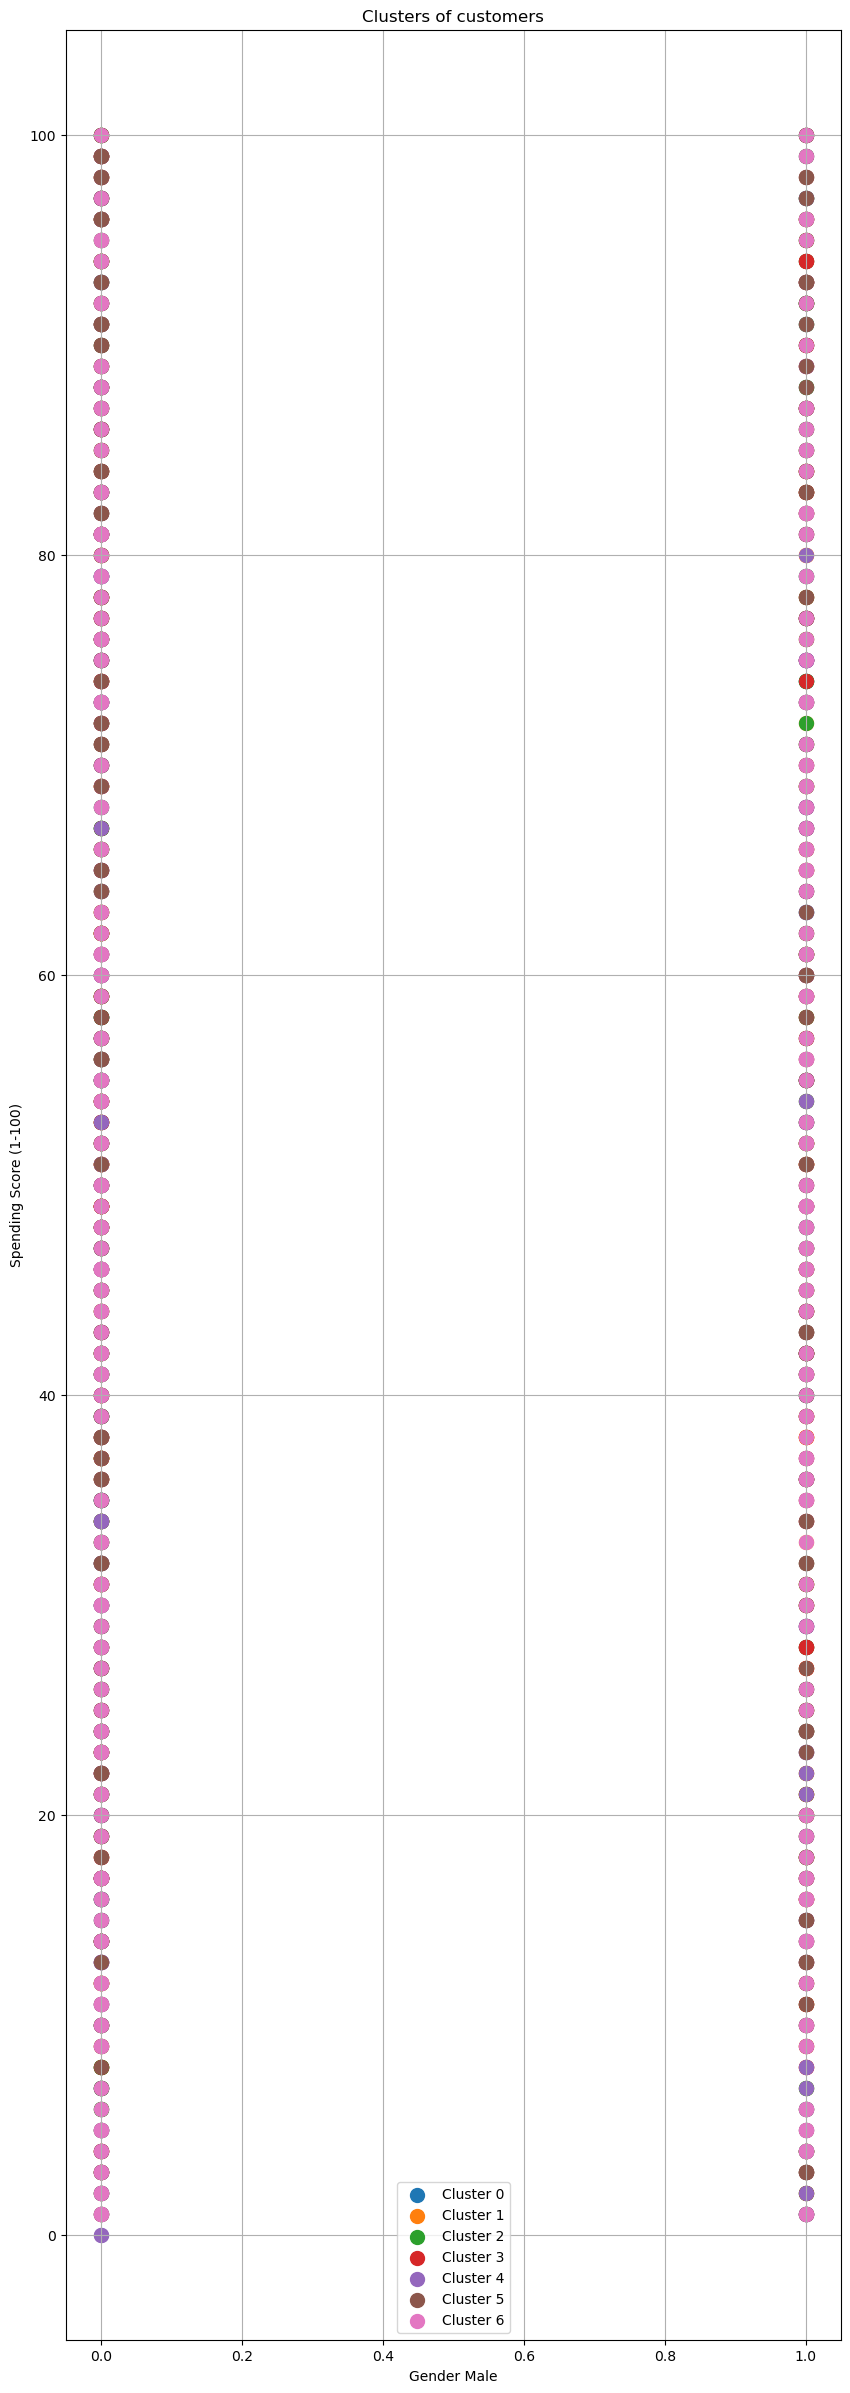

In [16]:
plt.figure(figsize=(10, 30))

for cluster_label in set(y_pred):
    plt.scatter(customer_encoded.loc[y_pred == cluster_label, 'Gender_Male'], 
                customer_encoded.loc[y_pred == cluster_label, 'Spending Score (1-100)'],
                s = 100, label = f'Cluster {cluster_label}')

# Plotting Label dengan menggabung 2 parameter
plt.title('Clusters of customers')
plt.xlabel('Gender Male')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

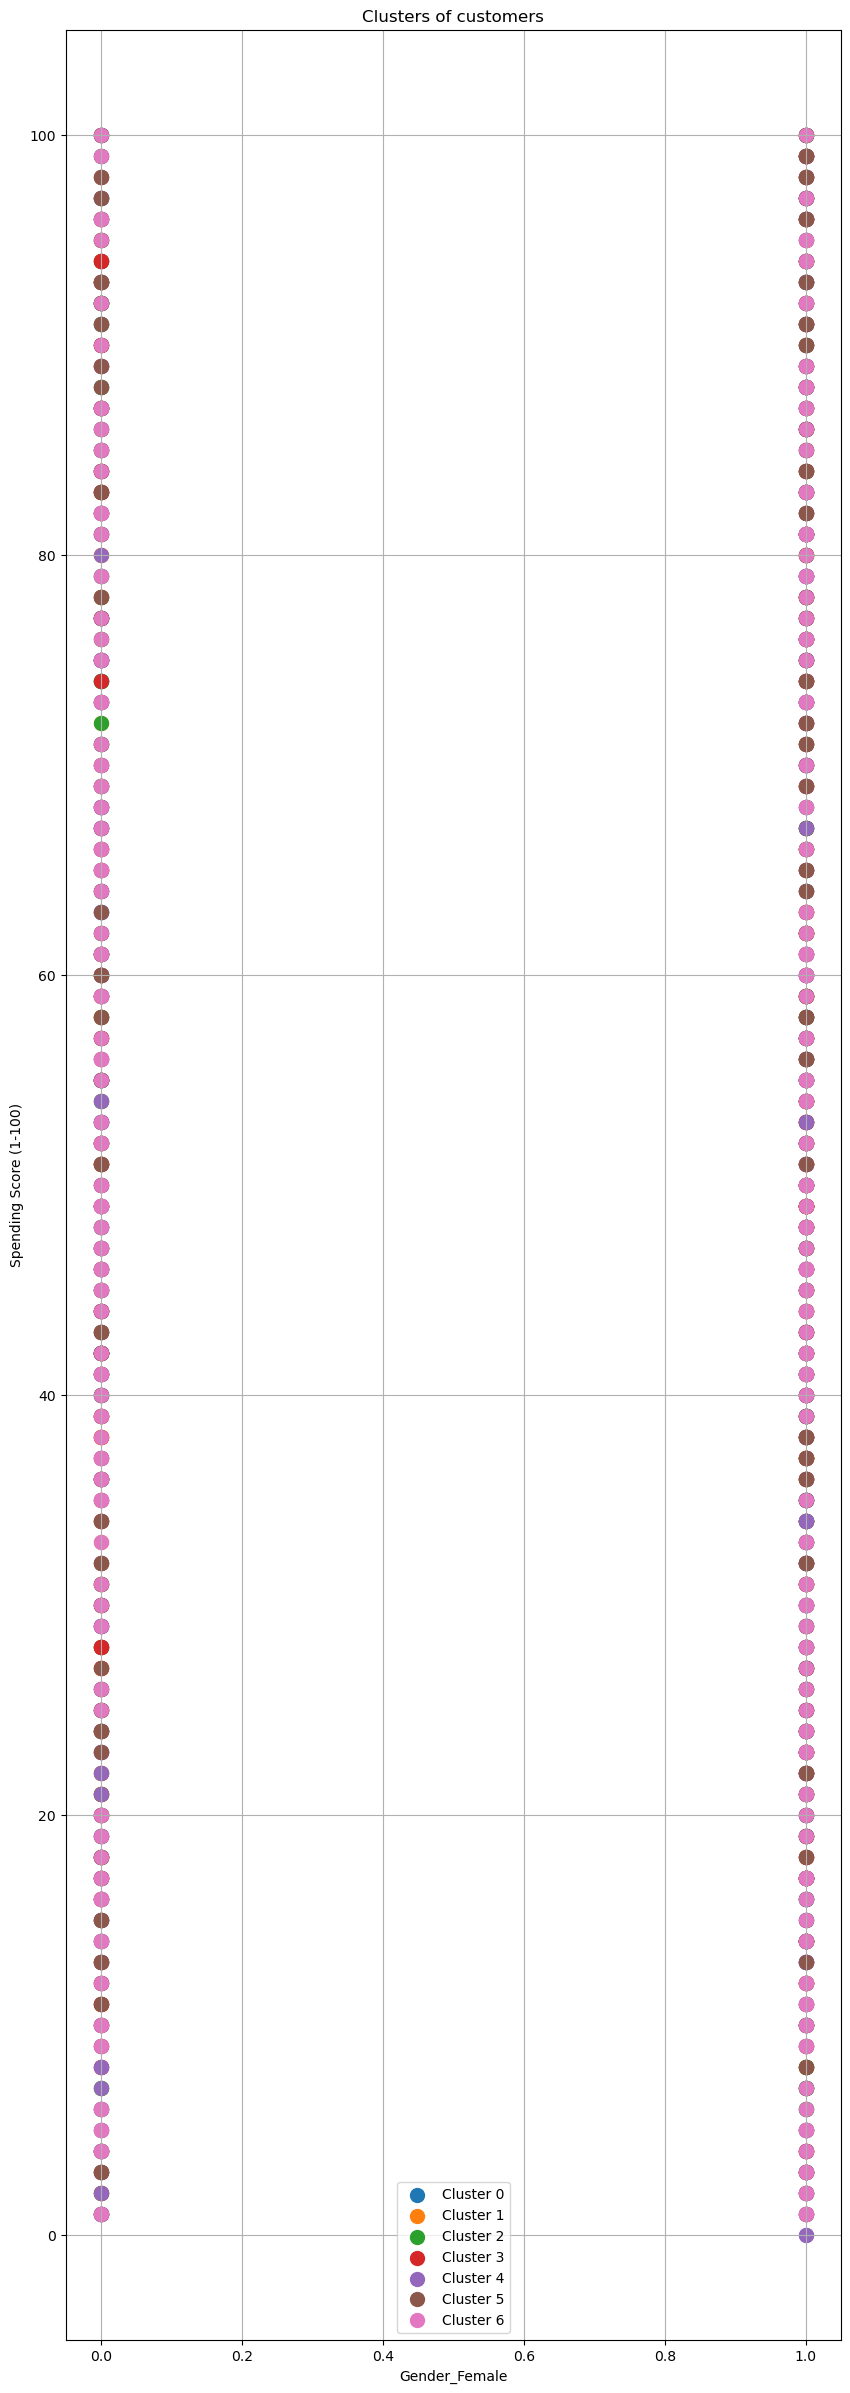

In [12]:
plt.figure(figsize=(10, 30))

for cluster_label in set(y_pred):
    plt.scatter(customer_encoded.loc[y_pred == cluster_label, 'Gender_Female'], 
                customer_encoded.loc[y_pred == cluster_label, 'Spending Score (1-100)'],
                s = 100, label = f'Cluster {cluster_label}')

# Plotting Label dengan menggabung 2 parameter
plt.title('Clusters of customers')
plt.xlabel('Gender_Female')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

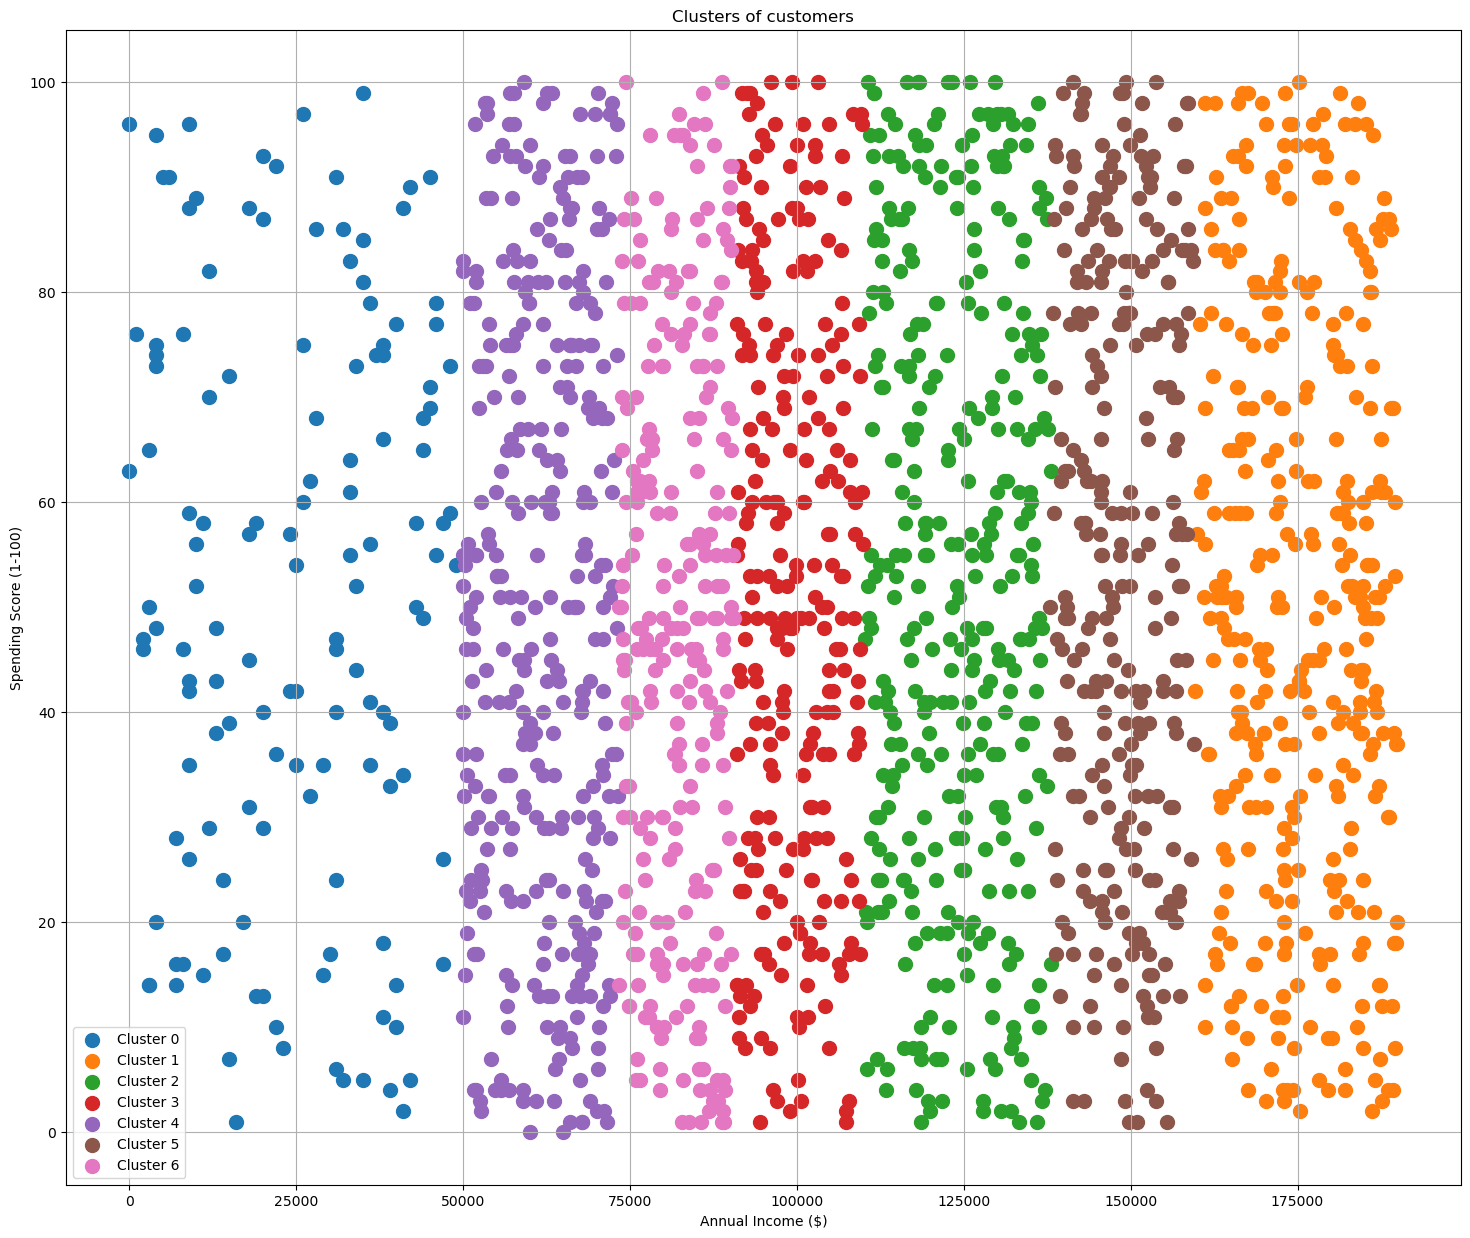

In [13]:
plt.figure(figsize=(18, 15))

for cluster_label in set(y_pred):
    plt.scatter(customer_encoded.loc[y_pred == cluster_label, 'Annual Income ($)'], 
                customer_encoded.loc[y_pred == cluster_label, 'Spending Score (1-100)'],
                s = 100, label = f'Cluster {cluster_label}')

# Plotting Label dengan menggabung 2 parameter
plt.title('Clusters of customers')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

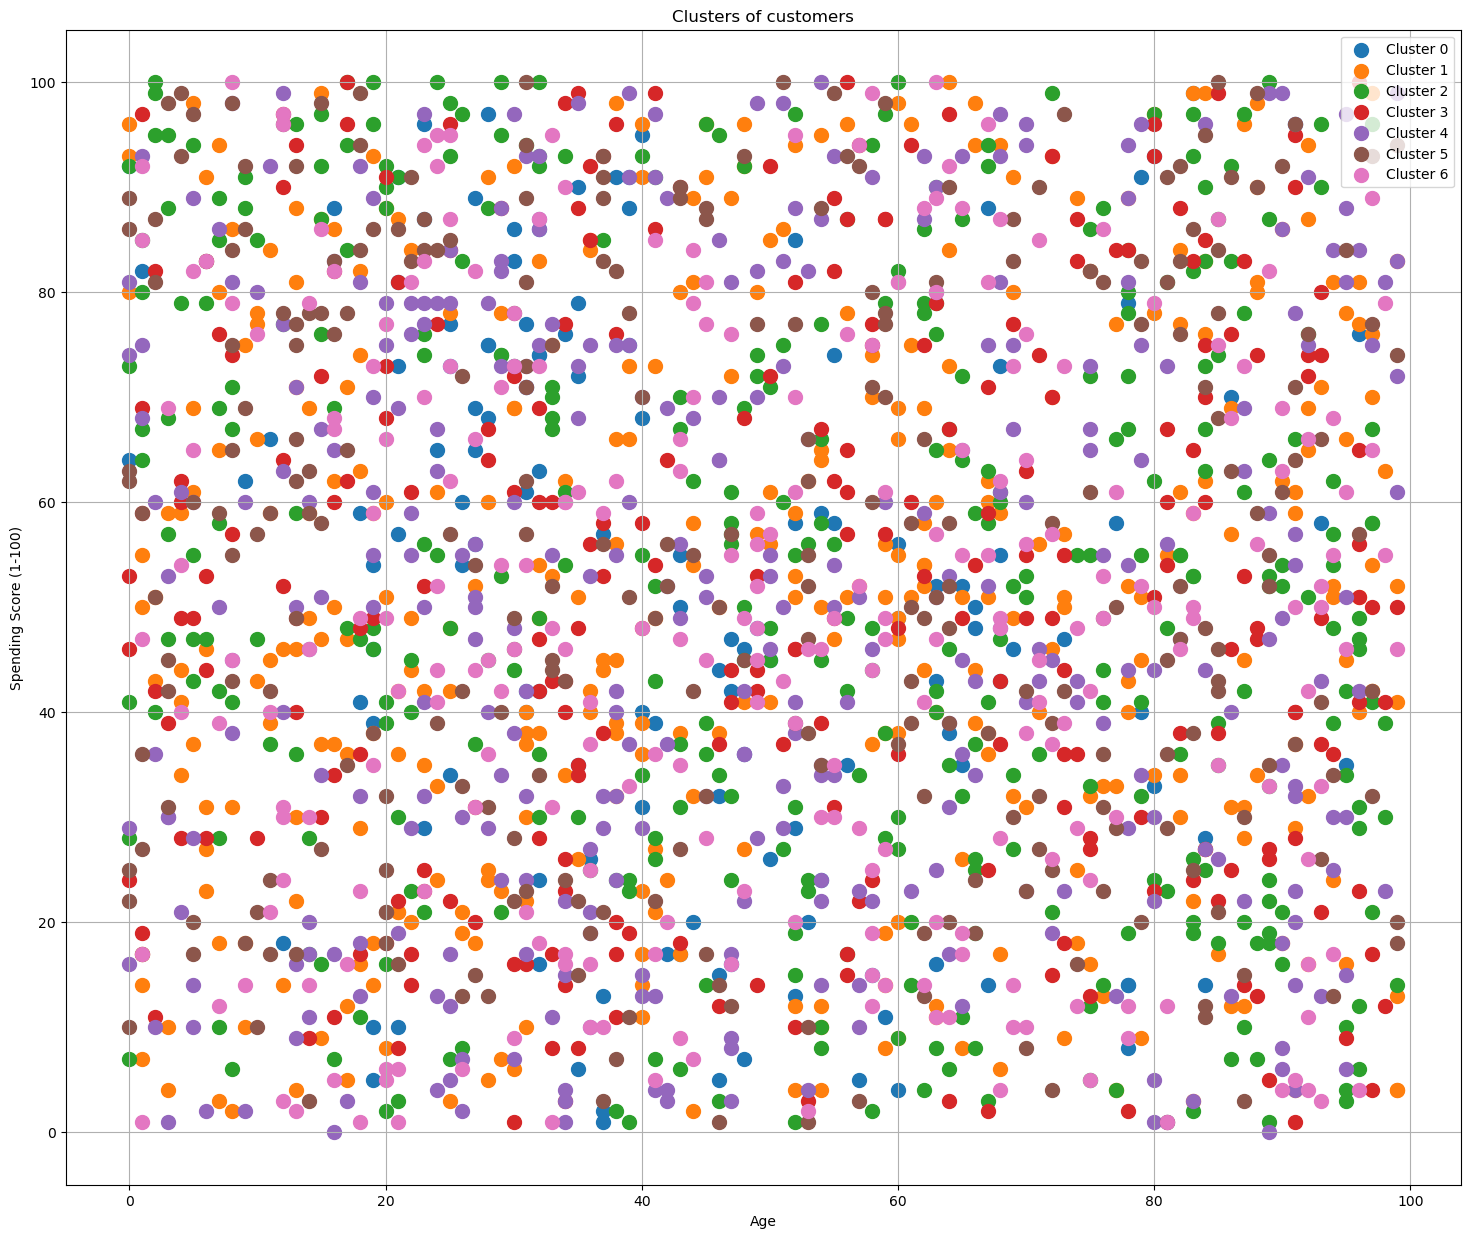

In [14]:
plt.figure(figsize=(18, 15))

for cluster_label in set(y_pred):
    plt.scatter(customer_encoded.loc[y_pred == cluster_label, 'Age'], 
                customer_encoded.loc[y_pred == cluster_label, 'Spending Score (1-100)'],
                s = 100, label = f'Cluster {cluster_label}')

# Plotting Label dengan menggabung 2 parameter
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()